### Decision Tree Classifier in Sklearn

This [tutorial](http://amunategui.github.io/simple-heuristics/index.html) was extremely helpful. 

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pydotplus
from IPython.display import Image  

In [2]:
data = pd.read_csv('TelcoChurn.csv')

---
Check the data types and if there are any missing values.  

In [3]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

---
Since this will transform the dataframe; I'm going to copy it. 

* customer ID doesn't appear to provide much value so it will be dropped.  
* TotalCharges should be numeric, but is coming in as an object.

In [5]:
x = data.drop(['customerID'], axis=1)

In [6]:
x['TotalCharges'] = pd.to_numeric(x['TotalCharges'], errors='coerse')


In [7]:
x['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [8]:
x.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

---
Apparently the to_numeric method created some nan's...this isn't good.  To get around it for now, the mean will take their place.

In [9]:
x['TotalCharges'].isnull().sum()

11

In [10]:
x['TotalCharges'] = x['TotalCharges'].fillna(x['TotalCharges'].mean())

In [11]:
x.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

----
Before dropping the target from the dataframe, copy it to another variable. After the target is dropped, dummy variables will be created as well as a list of feature names to be used to label the decision tree.

In [12]:
y = x['Churn'].values

In [13]:
x = x.drop(['Churn'], axis=1)

In [14]:
x = pd.get_dummies(x)

In [15]:
feature_names = []
for col in x.columns:
    feature_names.append(col)

---
Getting close to the fun stuff... train_test_split makes it easy to create a training set and a test set.  

In [16]:
seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

---
DecisionTreeClassifier [docs](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier). 

In [17]:
dTree = DecisionTreeClassifier(max_depth=3, class_weight='balanced')

In [18]:
dTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
seed = 7
test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

In [20]:
dTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
dTree.score(x_train, y_train)

0.73908435777871984

In [22]:
dot_data = StringIO()

In [23]:
export_graphviz(dTree, out_file=dot_data, filled=True,
                feature_names=feature_names,
                class_names=['No', 'Yes'], rounded=True, 
                special_characters=True)

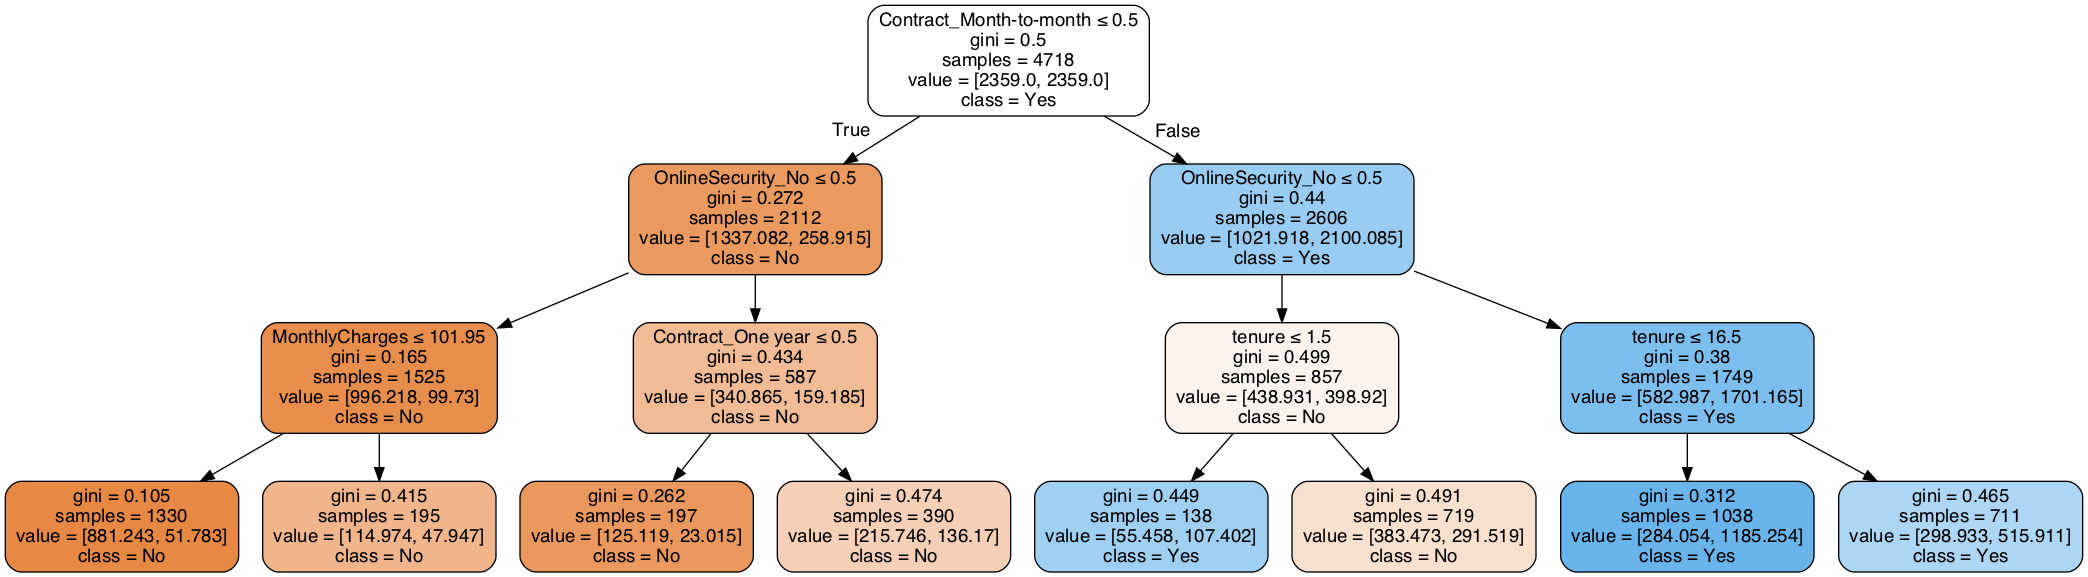

In [24]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())